## Import Necessary Libraries


In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Display Dataset Files in Kaggle

In [32]:
# Display all files in the Kaggle input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv


## Load the Dataset

In [33]:
# Load dataset
file_path = "/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Explore the Dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [35]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [36]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## Visualize Target Variable Distribution

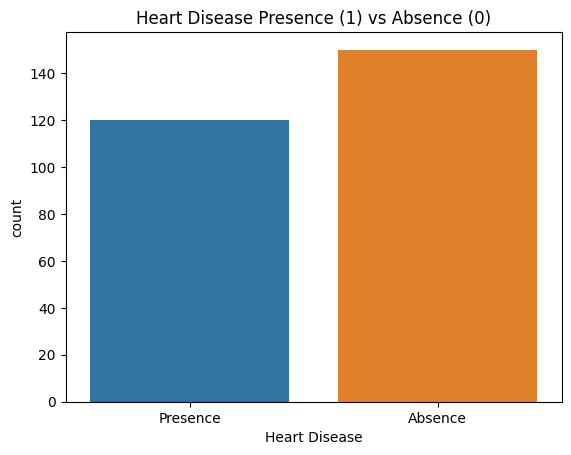

In [37]:
# Visualizing the distribution of heart disease presence (1) vs absence (0)
sns.countplot(x='Heart Disease', data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()


In [38]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Split Data into Features and Target

In [66]:
# Feature and target split
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']


## Step 4: Encode Categorical Variables (If Needed)

In [67]:



df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,True
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,False
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,True
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,False
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,False


## Define Synthetic Data Generator

In [76]:
def generate_synthetic_data(original_data, num_samples):
    """
    Generates synthetic data for all columns except the last (target) column.
    Formula: mean(column) + np.random.normal(0, std_dev(column))
    """
    feature_columns = original_data.columns[:-1]  # Exclude the last column (target)
    target_column = original_data.columns[-1]  # Identify the target column

    column_means = original_data[feature_columns].mean()
    column_variances = original_data[feature_columns].var()

    for _ in range(num_samples):
        synthetic_sample = column_means + np.random.normal(0, np.sqrt(column_variances))
        synthetic_sample[target_column] = np.random.choice(original_data[target_column])  # Randomly assign target
        yield synthetic_sample


## Generate Synthetic Data (50% of Original Data)

In [77]:
# Number of synthetic samples = 50% of original data
num_synthetic_samples = len(df) // 2

# Generate synthetic data using the generator function
synthetic_data = pd.DataFrame(list(generate_synthetic_data(df, num_synthetic_samples)), columns=df.columns)

# Display first few rows of synthetic data
synthetic_data.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,47.446301,0.548206,3.447362,115.449106,237.736964,-0.243699,0.313228,74.466248,1.478382,-0.700149,1.656368,-0.677565,3.576842,True
1,52.029759,1.507299,3.789411,106.562488,150.246192,-0.115735,1.132811,120.146304,0.932225,-0.130031,0.883380,1.289791,5.579307,True
2,58.941108,2.092479,3.040793,139.299784,275.880266,0.660500,1.157638,163.605933,0.364499,1.404900,0.604763,0.749866,5.055776,False
3,55.784730,1.066007,2.391081,120.013636,222.504839,-0.122337,0.549400,124.375232,-0.522542,0.538026,2.083218,1.836705,3.583559,False
4,70.498548,1.190273,2.880876,117.511151,321.282400,0.618103,2.615671,150.769472,-0.414242,0.359346,2.050500,0.606083,3.542814,False


## EDA of Generated data

In [78]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      135 non-null    float64
 1   Sex                      135 non-null    float64
 2   Chest pain type          135 non-null    float64
 3   BP                       135 non-null    float64
 4   Cholesterol              135 non-null    float64
 5   FBS over 120             135 non-null    float64
 6   EKG results              135 non-null    float64
 7   Max HR                   135 non-null    float64
 8   Exercise angina          135 non-null    float64
 9   ST depression            135 non-null    float64
 10  Slope of ST              135 non-null    float64
 11  Number of vessels fluro  135 non-null    float64
 12  Thallium                 135 non-null    float64
 13  Heart Disease            135 non-null    bool   
dtypes: bool(1), float64(13)
me

In [79]:
synthetic_data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [80]:
synthetic_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,53.951193,0.637375,3.249166,130.381607,246.292057,0.171932,0.958511,147.632574,0.332465,1.225151,1.561132,0.646534,4.827931
std,9.162362,0.493704,0.927208,18.626577,54.597694,0.371347,0.897149,22.274120,0.466609,1.099064,0.611360,0.846608,1.985262
min,24.843024,-0.720025,0.980630,80.753114,102.885562,-1.061412,-1.367965,74.466248,-0.808405,-1.822741,0.057196,-2.365045,-1.185642
25%,47.427149,0.319640,2.643505,119.025640,214.189246,-0.076924,0.347063,130.685400,0.008873,0.540039,1.138727,0.092570,3.597525
50%,53.367867,0.641766,3.289899,130.033179,250.410843,0.153652,1.081534,148.842378,0.349250,1.172712,1.567687,0.606083,4.902619
75%,59.024111,1.018638,3.811951,146.627589,288.805276,0.415911,1.503242,163.450912,0.603853,2.069924,1.998001,1.256819,6.162348
max,78.370322,2.092479,5.890287,171.993529,377.668241,1.202272,2.955328,192.410657,1.478382,3.687181,3.101211,2.471845,9.552241


## Merge Original and Synthetic Data

In [81]:
# Combine original and synthetic data
combined_data = pd.concat([df, synthetic_data], ignore_index=True)

# Display the shape of the new dataset
print("Shape of Combined Dataset:", combined_data.shape)

Shape of Combined Dataset: (405, 14)


In [82]:
combined_data.head()
combined_data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
400,45.680843,1.286784,2.600003,147.313935,367.888190,-0.239603,0.330695,139.678887,1.392673,0.970648,0.539519,2.187503,3.238349,True
401,49.768630,-0.198258,2.040758,129.553755,291.784862,0.928575,-0.387800,156.028527,0.321314,0.506712,2.273372,1.010544,6.126640,True
402,65.254904,0.273578,2.693337,131.122330,290.627512,0.317312,1.957030,147.980527,0.655558,-0.049170,0.416802,-0.896700,-0.898698,False
403,49.322294,0.976507,3.307055,138.951455,249.942275,0.420604,0.471279,124.362007,0.537608,-0.434781,0.717758,2.432915,6.910960,False
404,54.413494,0.396463,4.059989,150.778282,291.452566,-0.504540,1.397693,184.796724,1.372129,0.840478,2.197614,1.460642,3.854572,False


## Split Features and Target Variable

In [83]:
# Define features (X) and target variable (y)
X = combined_data.drop(columns=["Heart Disease"])  # Assuming "target" is the label column
y = combined_data["Heart Disease"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (324, 13)
Testing Data Shape: (81, 13)


## Train Logistic Regression Model

In [84]:
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


## Evaluate Model Performance

In [85]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model Accuracy: 0.6296296296296297

Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.61      0.65        46
        True       0.56      0.66      0.61        35

    accuracy                           0.63        81
   macro avg       0.63      0.63      0.63        81
weighted avg       0.64      0.63      0.63        81


Confusion Matrix:
 [[28 18]
 [12 23]]


## Visualize Confusion Matrix

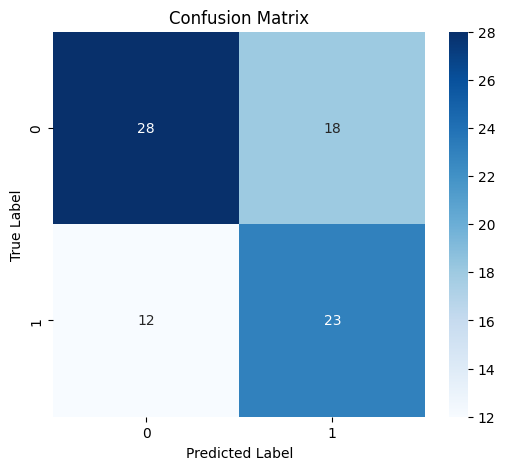

In [86]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Visualizing Class Distribution

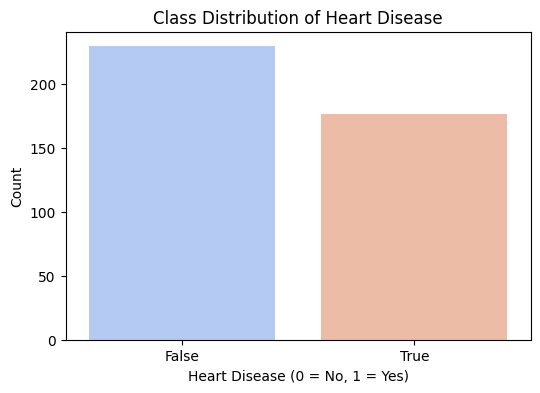

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x="Heart Disease", data=combined_data, palette="coolwarm")
plt.title("Class Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


 ## Feature Correlation Heatmap

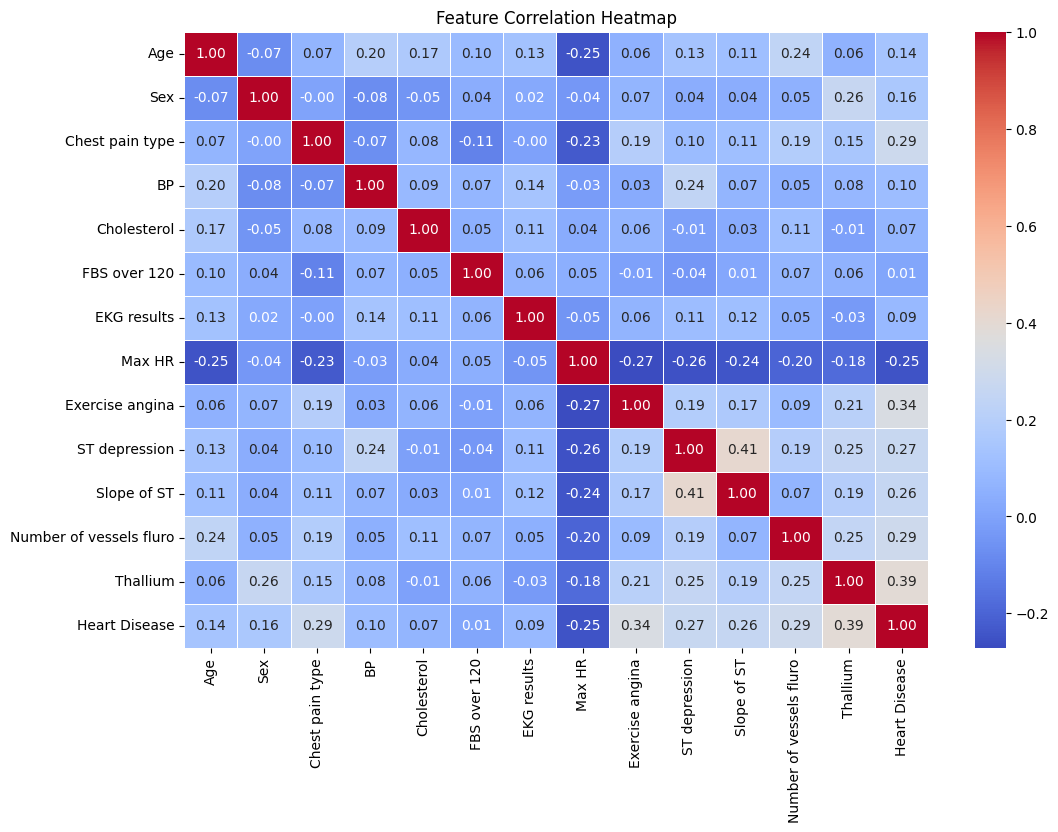

In [88]:
import numpy as np

plt.figure(figsize=(12, 8))
sns.heatmap(combined_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## ROC Curve

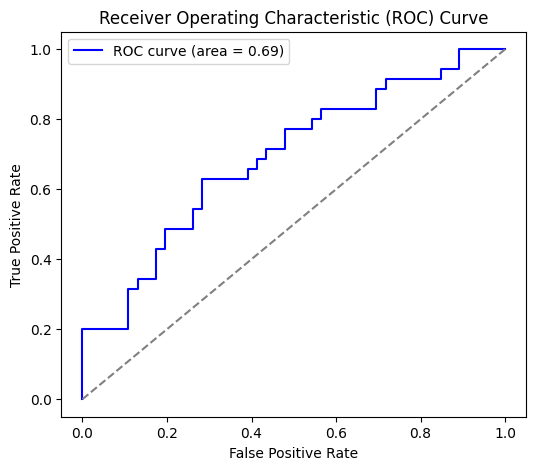

In [89]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()
